# Last 1 yt Stocks Data

In [1]:
import pandas as pd

# Replace 'stocks_data.csv' with the actual path to your CSV file
file_path = 'ind_niftysmallcap250list.csv'

def extract_stock_codes(file_path):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Extract the "Stock Code" column into a list
        stock_codes_list = df['Symbol'].astype(str).tolist()

        return stock_codes_list

    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage:
stock_codes_list = extract_stock_codes(file_path)


import yfinance as yf

def get_stock_data_list(stock_codes, period='1y'):
    all_stock_data = []

    for stock_code in stock_codes:
        try:
            yahoo_ticker = stock_code + '.NS'
            stock = yf.Ticker(yahoo_ticker)
            data = stock.history(period=period)
            if not data.empty:
                # Extract relevant features from historical stock data
                stock_data = {
                    'Date': data.index.tolist(),
                    'Ticker': stock_code,
                    'Open': data['Open'].tolist(),
                    'High': data['High'].tolist(),
                    'Low': data['Low'].tolist(),
                    'Close': data['Close'].tolist(),
                    'Volume': data['Volume'].tolist(),
                    'Sector': stock.info.get('industry', 'N/A')
                }
                all_stock_data.append(pd.DataFrame(stock_data))
            else:
                print(f"No data available for {stock_code}")
        except Exception as e:
            print(f"Error fetching data for {stock_code}: {e}")

    return pd.concat(all_stock_data, ignore_index=True)

# Example usage:
duration_period = '1y'  # Change the duration as needed, e.g., '1mo', '3mo', '1y', etc.

stock_data_df = get_stock_data_list(stock_codes_list, period=duration_period)

# Display the DataFrame
stock_data_df

,Date,Ticker,Open,High,Low,Close,Volume,Sector
0,2023-07-26 00:00:00+05:30,360ONE,511.099417,511.099417,497.567458,499.417145,120782,Asset Management
1,2023-07-27 00:00:00+05:30,360ONE,499.417139,504.917566,493.429981,498.881714,85462,Asset Management
2,2023-07-28 00:00:00+05:30,360ONE,500.402511,502.364874,498.489195,501.138397,97934,Asset Management
3,2023-07-31 00:00:00+05:30,360ONE,503.002650,515.071169,503.002650,511.833282,140811,Asset Management
4,2023-08-01 00:00:00+05:30,360ONE,515.120217,516.984485,501.678020,508.595337,319817,Asset Management
...,...,...,...,...,...,...,...,...
61135,2024-07-22 00:00:00+05:30,ECLERX,2390.000000,2445.350098,2380.000000,2434.550049,41236,Information Technology Services
61136,2024-07-23 00:00:00+05:30,ECLERX,2399.000000,2444.850098,2351.000000,2382.050049,83667,Information Technology Services
61137,2024-07-24 00:00:00+05:30,ECLERX,2383.699951,2437.000000,2375.000000,2431.100098,37555,Information Technology Services
61138,2024-07-25 00:00:00+05:30,ECLERX,2429.000000,2429.000000,2374.199951,2393.250000,38679,Information Technology Services


# 52 WEEK High Stocks

In [2]:
df = stock_data_df
df['Date'] = pd.to_datetime(df['Date'])
latest_close = df.loc[df.groupby('Ticker')['Date'].idxmax()]
past_max_close = df[df['Date'] < latest_close['Date'].max()].groupby('Ticker')['Close'].max()
latest_close = latest_close[latest_close['Ticker'].map(latest_close.set_index('Ticker')['Close']) >latest_close['Ticker'].map(past_max_close)]
# Select the desired columns
result = latest_close[['Ticker', 'Close', 'Date', 'Volume', 'Sector']]
result = result.reset_index(drop=True)
print("52 Week High Stocks: ", result.shape)
result.head(30)

52 Week High Stocks:  (24, 5)


,Ticker,Close,Date,Volume,Sector
0,AFFLE,1460.250000,2024-07-26 00:00:00+05:30,1060037,Advertising Agencies
1,APLLTD,1216.349976,2024-07-26 00:00:00+05:30,477497,Drug Manufacturers - Specialty & Generic
2,CDSL,2446.800049,2024-07-26 00:00:00+05:30,1167614,Capital Markets
3,DEEPAKFERT,862.250000,2024-07-26 00:00:00+05:30,2556235,Chemicals
4,ERIS,1073.500000,2024-07-26 00:00:00+05:30,161475,Drug Manufacturers - Specialty & Generic
5,FSL,256.269989,2024-07-26 00:00:00+05:30,7083391,Information Technology Services
6,GLENMARK,1438.400024,2024-07-26 00:00:00+05:30,703609,Drug Manufacturers - Specialty & Generic
7,GRANULES,563.099976,2024-07-26 00:00:00+05:30,1267288,Drug Manufacturers - Specialty & Generic
8,IDBI,104.220001,2024-07-26 00:00:00+05:30,87254681,Banks - Regional
9,INDIACEM,374.049988,2024-07-26 00:00:00+05:30,15095344,Building Materials


# Statistics

In [3]:
# Group by Ticker and calculate the requested statistics

#List
df = stock_data_df[(stock_data_df.Ticker.isin(result.Ticker.tolist()))].reset_index(drop=True)

ticker_grouped = df.groupby('Ticker')
agg_functions = {
    'Close': ['min', 'max', 'median', 'mean', 'var', 'std']
}

stock_summary = ticker_grouped.agg(agg_functions).reset_index()

# Flatten the multi-level columns
stock_summary.columns = ['{}_{}'.format(col[0], col[1]) for col in stock_summary.columns]
stock_summary = stock_summary.rename(columns={'Ticker_': 'Ticker'})

# Display the summary DataFrame
stock_summary

,Ticker,Close_min,Close_max,Close_median,Close_mean,Close_var,Close_std
0,AFFLE,1013.599976,1460.250000,1113.849976,1152.230611,10845.304915,104.140794
1,APLLTD,692.655273,1216.349976,870.731934,866.746612,13038.887009,114.187946
2,CDSL,1122.399292,2446.800049,1842.700439,1764.215112,125667.869621,354.496643
3,DEEPAKFERT,459.950012,862.250000,608.400024,605.354590,5939.449200,77.067822
4,ERIS,757.650024,1073.500000,883.049988,893.292653,4467.411455,66.838697
5,FSL,134.905045,256.269989,187.226181,185.298625,674.289358,25.967082
6,GLENMARK,724.450012,1438.400024,879.650024,938.029977,33733.675115,183.667295
7,GRANULES,290.350006,563.099976,410.850006,402.096041,3813.504324,61.753577
8,IDBI,56.507992,104.220001,75.442345,74.907477,123.846719,11.128644
9,INDIACEM,184.699997,374.049988,231.149994,238.106899,940.816443,30.672731


In [4]:
# Left join the ticker_features DataFrame with the original stock_data_df DataFrame
import numpy as np

#List
df = stock_data_df[(stock_data_df.Ticker.isin(result.Ticker.tolist()))].reset_index(drop=True)

merged_df = pd.merge(df , stock_summary, on='Ticker', how='left')

merged_df['Close_z_score'] = (merged_df['Close'] - merged_df['Close_mean']) / merged_df['Close_std']

# Format the 'Date' column
merged_df['Date'] = merged_df['Date'].dt.strftime('%Y-%m-%d')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Define the conditions and corresponding values for the new column
conditions = [
    (merged_df['Close_z_score'] <= 1) & (merged_df['Close_z_score'] >= -1),
    (merged_df['Close_z_score'] <= 2) & (merged_df['Close_z_score'] >= -2),
    (merged_df['Close_z_score'] <= 3) & (merged_df['Close_z_score'] >= -3),
    (merged_df['Close_z_score'] > 3) & (merged_df['Close_z_score'] < -3),
]

# Define corresponding values for each condition
values = ['Within_1', 'Within_2', 'Within_3', 'More_3']

# Create the new column based on the conditions
merged_df['ZScore_Category'] = np.select(conditions, values, default='Other')


# Sort the DataFrame by 'Ticker' and 'Date'
merged_df = merged_df.sort_values(by=['Ticker', 'Date'], ascending=[True, False]).reset_index(drop=True)

# Display the merged DataFrame
merged_df.head()

,Date,Ticker,Open,High,Low,Close,Volume,Sector,Close_min,Close_max,Close_median,Close_mean,Close_var,Close_std,Close_z_score,ZScore_Category
0,2024-07-26,AFFLE,1433.800049,1488.550049,1422.300049,1460.250000,1060037,Advertising Agencies,1013.599976,1460.25,1113.849976,1152.230611,10845.304915,104.140794,2.957721,Within_3
1,2024-07-25,AFFLE,1380.000000,1444.900024,1368.300049,1433.849976,869911,Advertising Agencies,1013.599976,1460.25,1113.849976,1152.230611,10845.304915,104.140794,2.704218,Within_3
2,2024-07-24,AFFLE,1380.000000,1419.000000,1373.050049,1402.949951,262890,Advertising Agencies,1013.599976,1460.25,1113.849976,1152.230611,10845.304915,104.140794,2.407504,Within_3
3,2024-07-23,AFFLE,1381.900024,1389.900024,1324.050049,1381.050049,485339,Advertising Agencies,1013.599976,1460.25,1113.849976,1152.230611,10845.304915,104.140794,2.197212,Within_3
4,2024-07-22,AFFLE,1351.000000,1383.949951,1336.900024,1372.949951,293290,Advertising Agencies,1013.599976,1460.25,1113.849976,1152.230611,10845.304915,104.140794,2.119432,Within_3


# Forecast Close price

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input

In [39]:
#One Stock
df = stock_data_df[(stock_data_df.Ticker=='SUZLON')].reset_index(drop=True)
# Display the first 5 rows of the dataframe
print(df.head())

# Extract the 'Close' prices as our feature
data = df['Close'].values.reshape(-1, 1)

                       Date  Ticker       Open       High        Low  \
0 2023-07-26 00:00:00+05:30  SUZLON  18.049999  18.049999  18.049999   
1 2023-07-27 00:00:00+05:30  SUZLON  17.650000  18.400000  17.450001   
2 2023-07-28 00:00:00+05:30  SUZLON  17.799999  18.250000  17.700001   
3 2023-07-31 00:00:00+05:30  SUZLON  18.200001  18.950001  18.049999   
4 2023-08-01 00:00:00+05:30  SUZLON  19.549999  19.850000  19.100000   

       Close     Volume                          Sector  
0  18.049999   41086178  Specialty Industrial Machinery  
1  17.850000  250669150  Specialty Industrial Machinery  
2  18.049999   97658422  Specialty Industrial Machinery  
3  18.950001  123353716  Specialty Industrial Machinery  
4  19.299999  167771796  Specialty Industrial Machinery  


In [40]:
# Normalize the data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:training_data_len, :]

In [41]:
# Create the training dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [42]:
# Convert the training datasets to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to be 3-dimensional for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [43]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.summary()

C:\Users\Abhishek_Jaiswal\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

136/136 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0420


In [46]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = data[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the testing datasets to numpy arrays
x_test = np.array(x_test)

In [47]:
# Reshape the data to be 3-dimensional for LSTM input
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B69AE80900> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 8.15149514803912
MAE: 7.722328341737086


In [49]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Abhishek_Jaiswal\AppData\Local\Temp\ipykernel_30932\3983594056.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



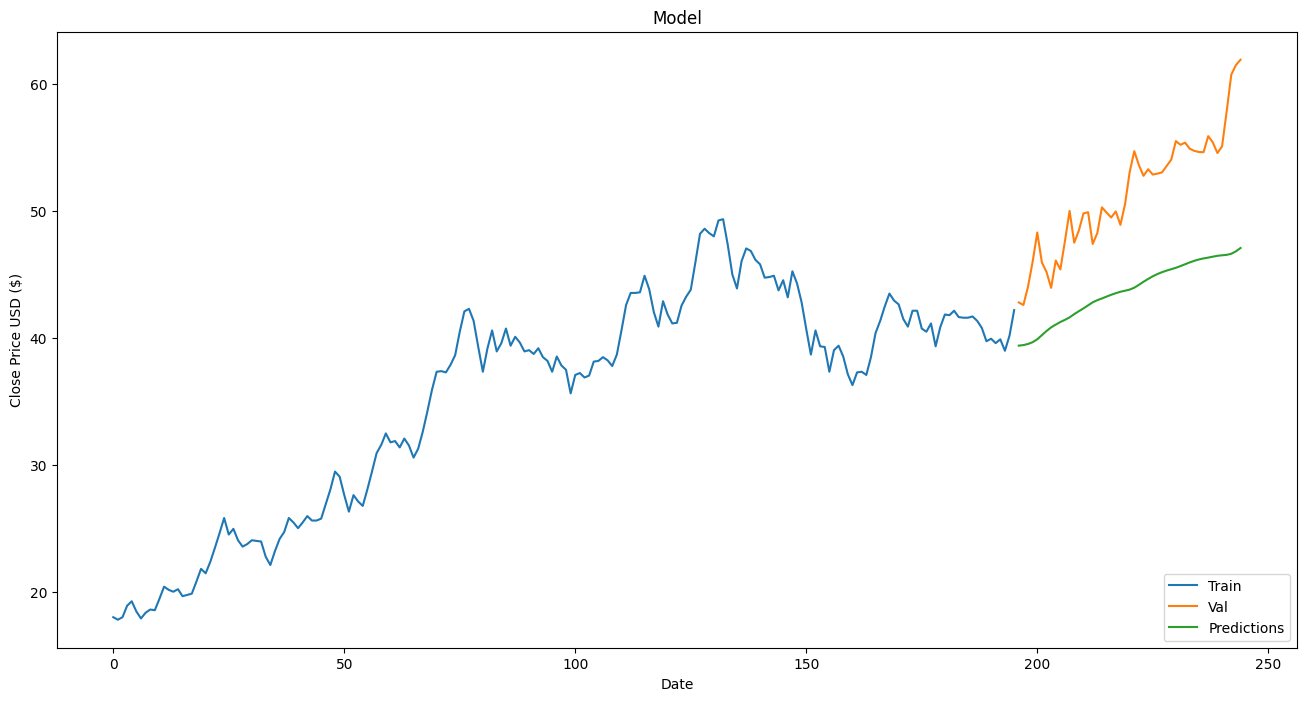

In [50]:
# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# LLM

In [63]:
#https://github.com/amazon-science/chronos-forecasting
#https://github.com/amazon-science/chronos-forecasting
#pip install git+https://github.com/amazon-science/chronos-forecasting.git
#conda install pytorch torchvision torchaudio cudatoolkit=10.2 -c pytorch

In [106]:
df = stock_data_df[(stock_data_df.Ticker=='SUZLON')].reset_index(drop=True)
# Convert 'datetime_column' to datetime type
df['Date'] = df['Date'].dt.date
df.tail()

,Date,Ticker,Open,High,Low,Close,Volume,Sector
240,2024-07-22,SUZLON,54.660000,55.439999,53.500000,55.080002,47805246,Specialty Industrial Machinery
241,2024-07-23,SUZLON,57.200001,57.830002,54.000000,57.830002,281887693,Specialty Industrial Machinery
242,2024-07-24,SUZLON,59.700001,60.720001,59.630001,60.720001,90757700,Specialty Industrial Machinery
243,2024-07-25,SUZLON,62.290001,63.750000,60.799999,61.470001,170325709,Specialty Industrial Machinery
244,2024-07-26,SUZLON,62.680000,63.000000,61.000000,61.889999,67858407,Specialty Industrial Machinery


Input TS Before :  (245, 8)
Input TS After:  (239, 8)


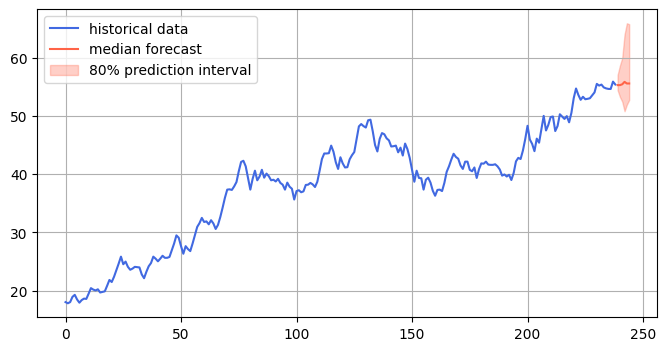

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-base",   #chronos-t5-base, chronos-t5-tiny
  device_map="cpu",
  torch_dtype=torch.bfloat16,
)



df = stock_data_df[(stock_data_df.Ticker=='SUZLON')].reset_index(drop=True)
# Convert 'datetime_column' to datetime type
df['Date'] = df['Date'].dt.date
print("Input TS Before : ",df.shape)
df = df.head(239)
print("Input TS After: ",df.shape)

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["Close"])
prediction_length = 6
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
pred , low, median, high = np.quantile(forecast[0].numpy(), [0 , 0.05, 0.5, 0.95], axis=0)

# Create a DataFrame with the forecast data
df_forecast = pd.DataFrame({
    'Predicted': pred,
    'Low': low,
    'Median': median,
    'High': high
})

plt.figure(figsize=(8, 4))
plt.plot(df["Close"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

In [120]:
# Actual:
df2 = stock_data_df[(stock_data_df.Ticker=='SUZLON')].reset_index(drop=True)
df2['Date'] = df2['Date'].dt.date
df2[['Date','Close']].tail(6)

,Date,Close
239,2024-07-19,54.549999
240,2024-07-22,55.080002
241,2024-07-23,57.830002
242,2024-07-24,60.720001
243,2024-07-25,61.470001
244,2024-07-26,61.889999


In [121]:
#Predicted
df_forecast

,Predicted,Low,Median,High
0,53.885494,54.415973,55.281472,57.040463
1,51.931082,53.257295,55.281472,58.645858
2,51.651901,52.447601,55.421081,59.944135
3,50.535104,50.800326,55.839889,63.964585
4,51.931082,51.931082,55.560690,65.891077
5,51.931082,52.726817,55.560690,65.737500


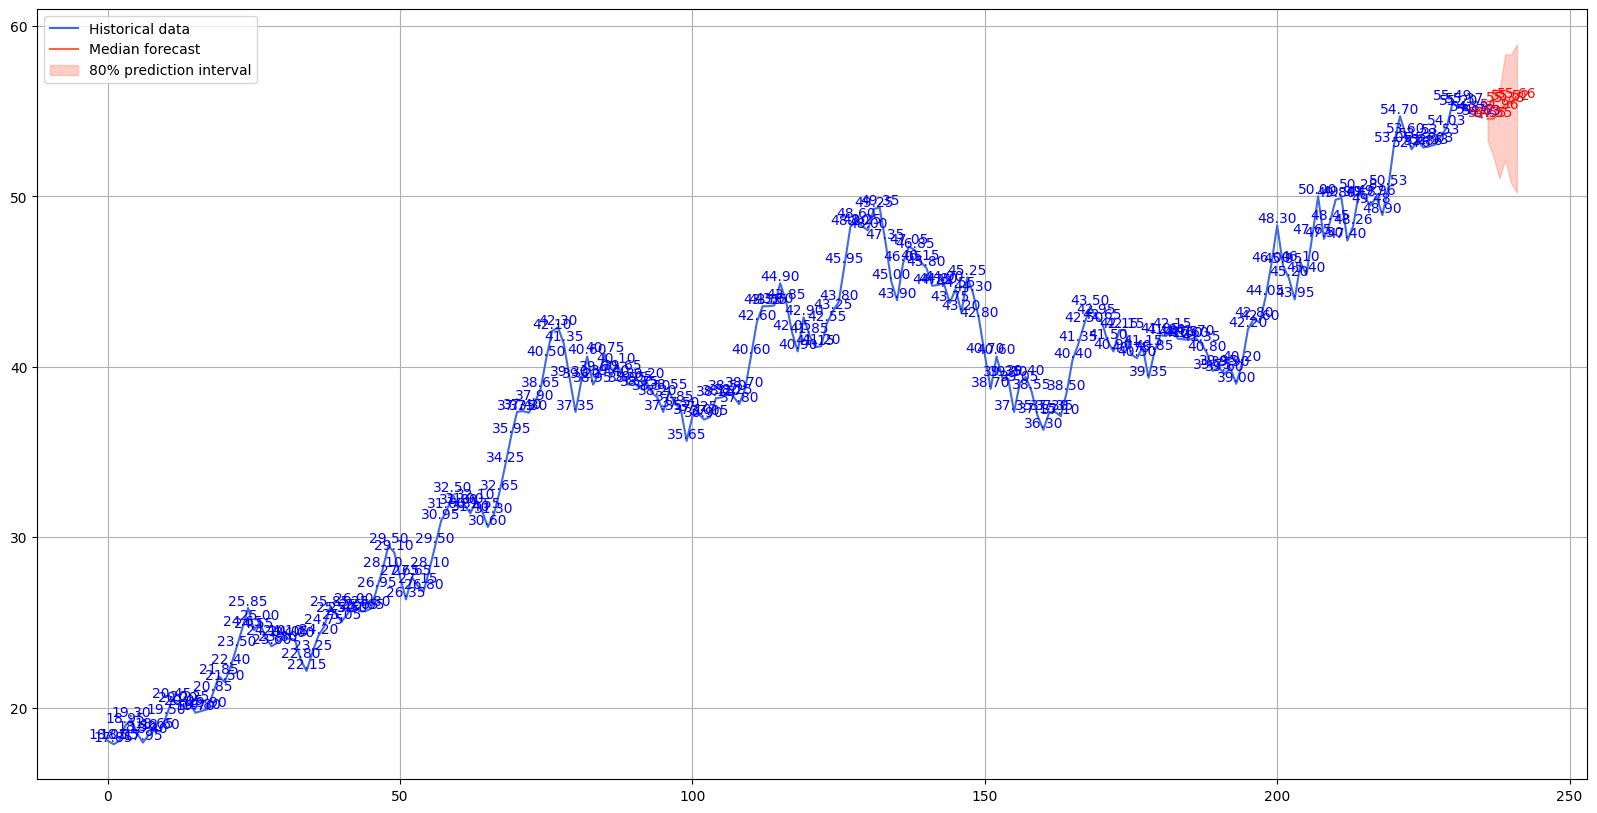

In [115]:
# Extract quantiles for the forecast
low, median, high = np.quantile(forecast[0].numpy(), [0.05, 0.5, 0.95], axis=0)

# Generate forecast index based on df's length
forecast_index = np.arange(len(df), len(df) + prediction_length)

plt.figure(figsize=(20, 10))
plt.plot(df["Close"], color="royalblue", label="Historical data")
plt.plot(forecast_index, median, color="tomato", label="Median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")

# Annotate historical data
for i, value in enumerate(df["Close"]):
    plt.text(i, value, f"{value:.2f}", fontsize=10, ha='center', va='bottom', color='blue')

# Annotate median forecast data
for i, (x, value) in enumerate(zip(forecast_index, median)):
    plt.text(x, value, f"{value:.2f}", fontsize=10, ha='center', va='bottom', color='red')

plt.legend()
plt.grid()
plt.show()

In [122]:
#LLM
#https://huggingface.co/google/timesfm-1.0-200m

# Trend Chart

In [60]:
import pandas as pd
import plotly.graph_objects as go

#One Stock
df = stock_data_df[(stock_data_df.Ticker=='SUZLON') & (stock_data_df.Date>='2024-07-01 00:00:00+05:30')].reset_index(drop=True)

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlestick'
)])

# Add traces for HH, LH, HL, LL (dummy example for illustration)
# Implement your own logic to detect these patterns
# Example for HH and LL (Replace with actual pattern logic)
for i in range(1, len(df)):
    if df['High'].iloc[i] > df['High'].iloc[i-1] and df['Low'].iloc[i] > df['Low'].iloc[i-1]:
        fig.add_trace(go.Scatter(
            x=[df['Date'].iloc[i]],
            y=[df['High'].iloc[i]],
            mode='markers',
            marker=dict(color='green', symbol='triangle-up', size=10),
            name='Higher High'
        ))
    elif df['High'].iloc[i] < df['High'].iloc[i-1] and df['Low'].iloc[i] < df['Low'].iloc[i-1]:
        fig.add_trace(go.Scatter(
            x=[df['Date'].iloc[i]],
            y=[df['Low'].iloc[i]],
            mode='markers',
            marker=dict(color='red', symbol='triangle-down', size=10),
            name='Lower Low'
        ))

# Add other traces and annotations as needed for LH, HL

# Update layout for better visualization
fig.update_layout(
    title='Candlestick Chart with Trends and Patterns',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    template='plotly_dark'
)

# Show the figure
fig.show()